In [1]:
import warnings
warnings.filterwarnings("ignore")

from torch_geometric.nn import GCN
from torch.optim import Adam
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split

from utils_data import *
from utils_classification import *
from utils_training import GraphTrainer
from utils_running import GraphRunner
from utils_evaluation import evaluate_graph_metrics
from utils_plot import plot_confusion_matrix, plot_roc

In [2]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = "mps"

In [3]:
data = PopulationData().load_raw('data/raw/train.csv')
data.encode_normalized_age()
data.encode_normalized_constitution()
data.encode_normalized_behavior()
# data.encode_standardized_age()
# data.encode_standardized_constitution()
# data.encode_standardized_behavior()
data.encode_connection_int()
data.encode_graph_nx()
data.encode_degree()
# data.encode_degree_centrality()
# data.encode_clustering_coefficient()
data.encode_normalized_degree()
# data.encode_normalized_degree_centrality()
# data.encode_normalized_clustering_coefficient()
# data.encode_standardized_degree()
# data.encode_standardized_degree_centrality()
# data.encode_standardized_clustering_coefficient()
# data.encode_connected_index_patient()
data.encode_distance_to_index_patient()
data.encode_normalized_distance_to_index_patient()
# data.encode_standardized_distance_to_index_patient()
data.encode_sum_neighbor_age()
data.encode_sum_neighbor_constitution()
data.encode_sum_neighbor_behavior()
data.encode_sum_neighbor_degree()
# data.encode_sum_neighbor_degree_centrality()
# data.encode_sum_neighbor_clustering_coefficient()
data.encode_normalized_sum_neighbor_age()
data.encode_normalized_sum_neighbor_constitution()
data.encode_normalized_sum_neighbor_behavior()
data.encode_normalized_sum_neighbor_degree()
# data.encode_normalized_sum_neighbor_degree_centrality()
# data.encode_normalized_sum_neighbor_clustering_coefficient()
# data.encode_standardized_sum_neighbor_age()
# data.encode_standardized_sum_neighbor_constitution()
# data.encode_standardized_sum_neighbor_behavior()
# data.encode_standardized_sum_neighbor_degree()
# data.encode_standardized_sum_neighbor_degree_centrality()
# data.encode_standardized_sum_neighbor_clustering_coefficient()
# data.encode_mean_neighbor_age()
# data.encode_mean_neighbor_constitution()
# data.encode_mean_neighbor_behavior()
# data.encode_mean_neighbor_degree()
# data.encode_mean_neighbor_degree_centrality()
# data.encode_mean_neighbor_clustering_coefficient()
# data.encode_normalized_mean_neighbor_age()
# data.encode_normalized_mean_neighbor_constitution()
# data.encode_normalized_mean_neighbor_behavior()
# data.encode_normalized_mean_neighbor_degree()
# data.encode_normalized_mean_neighbor_degree_centrality()
# data.encode_normalized_mean_neighbor_clustering_coefficient()
# data.encode_standardized_mean_neighbor_age()
# data.encode_standardized_mean_neighbor_constitution()
# data.encode_standardized_mean_neighbor_behavior()
# data.encode_standardized_mean_neighbor_degree()
# data.encode_standardized_mean_neighbor_degree_centrality()
# data.encode_standardized_mean_neighbor_clustering_coefficient()
data.encode_sum_population_age()
data.encode_sum_population_constitution()
data.encode_sum_population_behavior()
# data.encode_sum_population_degree()
# data.encode_sum_population_degree_centrality()
# data.encode_sum_population_clustering_coefficient()
data.encode_normalized_sum_population_age()
data.encode_normalized_sum_population_constitution()
data.encode_normalized_sum_population_behavior()
# data.encode_normalized_sum_population_degree()
# data.encode_normalized_sum_population_degree_centrality()
# data.encode_normalized_sum_population_clustering_coefficient()
# data.encode_standardized_sum_population_age()
# data.encode_standardized_sum_population_constitution()
# data.encode_standardized_sum_population_behavior()
# data.encode_standardized_sum_population_degree()
# data.encode_standardized_sum_population_degree_centrality()
# data.encode_standardized_sum_population_clustering_coefficient()
# data.encode_mean_population_age()
# data.encode_mean_population_constitution()
# data.encode_mean_population_behavior()
# data.encode_mean_population_degree()
# data.encode_mean_population_degree_centrality()
# data.encode_mean_population_clustering_coefficient()
# data.encode_normalized_mean_population_age()
# data.encode_normalized_mean_population_constitution()
# data.encode_normalized_mean_population_behavior()
# data.encode_normalized_mean_population_degree()
# data.encode_normalized_mean_population_degree_centrality()
# data.encode_normalized_mean_population_clustering_coefficient()
# data.encode_standardized_mean_population_age()
# data.encode_standardized_mean_population_constitution()
# data.encode_standardized_mean_population_behavior()
# data.encode_standardized_mean_population_degree()
# data.encode_standardized_mean_population_degree_centrality()
# data.encode_standardized_mean_population_clustering_coefficient()
data.encode_sum_population_distance_to_index_patient()
data.encode_normalized_sum_population_distance_to_index_patient()
# data.encode_standardized_sum_population_distance_to_index_patient()
# data.encode_mean_population_distance_to_index_patient()
# data.encode_normalized_mean_population_distance_to_index_patient()
# data.encode_standardized_mean_population_distance_to_index_patient()
data.encode_test_train()

In [4]:
# print the data
print(data.data_df.head())

       Population  Index_Patient  Infected  Age  Constitution  Behaviour   
ID                                                                         
430916         A0              0         1   49      0.347675          2  \
219261         A0              0         1   80      0.324719          1   
39908          A0              0         1   71      0.583583          1   
290949         A0              0         1   60      0.439978          2   
334513         A0              0         1   49      0.553221          1   

                                              Connections  Normalized_Age   
ID                                                                          
430916  [219261, 39908, 290949, 338617, 135884, 388685...        0.387097  \
219261  [430916, 334513, 530428, 59464, 481478, 568265...        0.637097   
39908   [430916, 98655, 454011, 40015, 388124, 77901, ...        0.564516   
290949  [430916, 565924, 588614, 30751, 51920, 133269,...        0.475806   
33451

In [5]:
features = ['Normalized_Age',
			'Normalized_Behaviour',
			'Normalized_Constitution',
			'Normalized_Degree',
			'Normalized_Distance_to_Index_Patient',
			'Normalized_Sum_Neighbor_Age',
			'Normalized_Sum_Neighbor_Behaviour',
			'Normalized_Sum_Neighbor_Constitution',
			'Normalized_Sum_Neighbor_Degree',
			'Normalized_Sum_Population_Age',
			'Normalized_Sum_Population_Behaviour',
			'Normalized_Sum_Population_Constitution',
			'Normalized_Sum_Population_Distance_to_Index_Patient']
graph = data.get_graph_torch(features=features)

In [34]:
# Define model parameters
in_channels = len(features)  # Number of input features
hidden_layers = [64, 32, 16]  # Number of hidden units for each layer
out_channels = 1  # Number of output classes (Infected/Not Infected)

In [35]:
# Initialize the model
model = GraphConvolutionalNetwork(in_channels, hidden_layers, out_channels)
criterion = torch.nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [36]:
trainer = GraphTrainer(model, criterion, optimizer)
trainer.train(graph, num_epochs=500, device='cuda')

100%|██████████| 200/200 [00:31<00:00,  6.35it/s]

Best model found with evaluation loss: 0.6787


In [43]:
trainer.test(graph, device='cuda')

Test loss: 0.6789


In [44]:
runner = GraphRunner(model)
test_prob = runner.predict_proba(graph, device=device)
test_pred = runner.predict(graph, device=device)

In [45]:
print("Test Predictions:", test_pred)
print("Test Probabilities:", test_prob)
print("Average Probability:", torch.mean(test_prob))
print("Shape of test_probabilities:", test_prob.shape)
print("Test Labels:", graph.y)

Test Predictions: tensor([1., 1., 0.,  ..., 1., 0., 0.], device='cuda:0')
Test Probabilities: tensor([0.6336, 0.6547, 0.6146,  ..., 0.6337, 0.6189, 0.6004], device='cuda:0')
Average Probability: tensor(0.6138, device='cuda:0')
Shape of test_probabilities: torch.Size([650000])
Test Labels: tensor([1, 1, 1,  ..., 1, 1, 0], device='cuda:0')


In [46]:
accuracy, precision, recall, f1, auc_roc, confusion_matrix = evaluate_graph_metrics(test_pred, test_prob, graph.y, graph.test_mask, device)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

Accuracy: 0.5684
Precision: 0.5625
Recall: 0.3665
F1: 0.4438
AUC-ROC: 0.5907


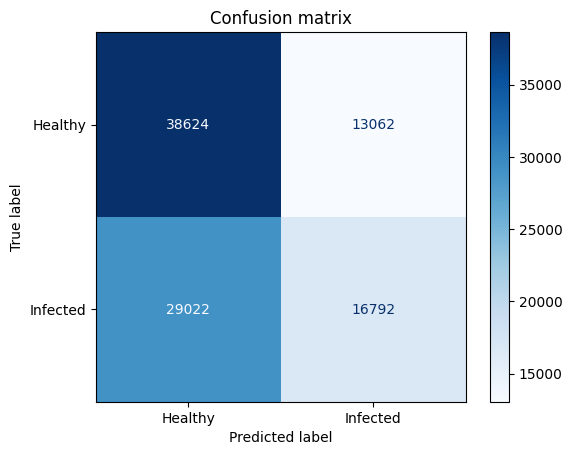

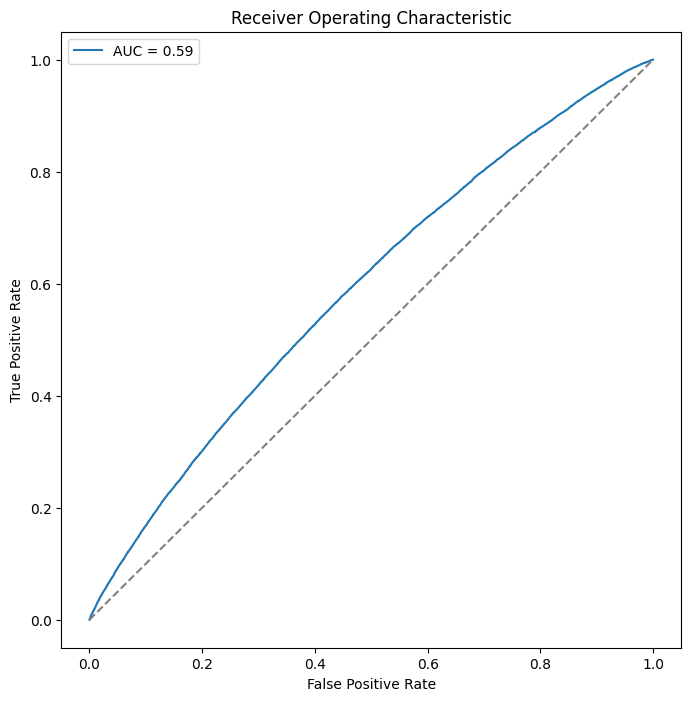

In [47]:
plot_confusion_matrix(confusion_matrix, ['Healthy', 'Infected'])

test_prob_filtered = test_prob[graph.test_mask].cpu().numpy()
test_labels_filtered = graph.y[graph.test_mask].cpu().numpy()

plot_roc(test_prob_filtered, test_labels_filtered)